In [2]:
import torch
from matplotlib import pyplot as plt

In [3]:
a = torch.tensor(0.001)

In [21]:
class LinearRegression:
    def __init__(self):
        self.w = torch.tensor(1.0, requires_grad= True)
        self.b = torch.tensor(1.0, requires_grad= True)
    
    def forward(self, x):
        return (self.w * x) + self.b
    
    def loss(self, y_pred, y):
        return (y - y_pred) ** 2
    
    def update(self):
        self.w -= a * self.w.grad
        self.b -= a * self.b.grad
        return

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

In [22]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
n = len(x)

In [23]:
model = LinearRegression()
loss_list = []
for epoch in range(100):
    loss = 0.0
    for i in range(n):
        y_pred = model.forward(x[i])
        loss += model.loss(y_pred, y[i])
    loss /= n
    loss.backward()
    with torch.no_grad():
        model.update()
    print(f'parameters - w = {model.w.item()}, b = {model.b.item()}, loss = {loss.item()}')
    model.reset_grad()
    loss_list.append(loss.detach().numpy())

parameters - w = 5.170400619506836, b = 1.2899999618530273, loss = 25359.80078125
parameters - w = 7.875868797302246, b = 1.4793304204940796, loss = 10952.734375
parameters - w = 9.630961418151855, b = 1.6033508777618408, loss = 4889.1201171875
parameters - w = 10.76949691772461, b = 1.6850011348724365, loss = 2337.07373046875
parameters - w = 11.508041381835938, b = 1.7391631603240967, loss = 1262.96875
parameters - w = 11.987090110778809, b = 1.7754918336868286, loss = 810.8944702148438
parameters - w = 12.297791481018066, b = 1.8002506494522095, loss = 620.6205444335938
parameters - w = 12.49927806854248, b = 1.8175032138824463, loss = 540.5318603515625
parameters - w = 12.629910469055176, b = 1.829885482788086, loss = 506.8174743652344
parameters - w = 12.714576721191406, b = 1.839107871055603, loss = 492.6212463378906
parameters - w = 12.769421577453613, b = 1.8462798595428467, loss = 486.63970947265625
parameters - w = 12.80492115020752, b = 1.8521212339401245, loss = 484.1155395

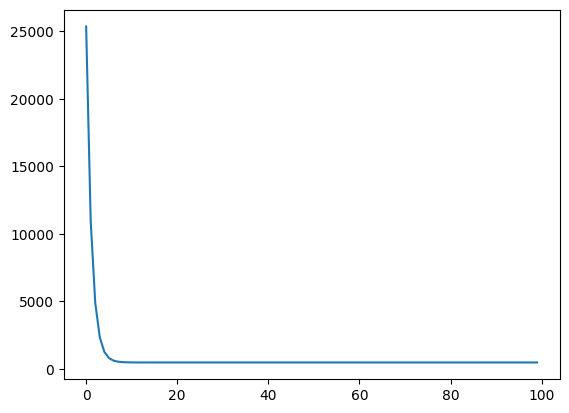

In [24]:
plt.plot(loss_list)
plt.show()